In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import obspy
from obspy.core import read
import ipywidgets as widgets

In [19]:
## parsing to Json or just any input file 
def parse_input_file(filename):
    request = {}
    for t in ['EQS','EQP','SUS','SUP','THS','THP','SNS','SNP','PXS','PXP']:
        request[t] = []
    with open(filename, 'r') as infile:
        for line in infile: 
            pick = {}
            pick_line = line.split(',')
            pick['event_type'] = pick_line[0].replace('[','').replace("'",'').strip()
            pick['time'] = pick_line[1].replace("'",'').strip()
            pick['sta'] = pick_line[2].replace("'",'').strip()
            pick['net'] = pick_line[3].replace("'",'').strip()
            pick['loc'] = pick_line[4].replace("'",'').strip()
            pick['chan'] = pick_line[5].replace("'",'').strip()
            pick['pick_type'] = pick_line[6].replace("'",'').strip()
            pick['quality'] = pick_line[7].replace("'",'').strip()
            pick['who'] = pick_line[8].replace(']','').replace("'",'').strip()
            #print(pick) 
            key = "{}{}".format(pick['event_type'], pick['pick_type'])
            #print(key)
            request[key].append(pick)
    return request
test = parse_input_file('../Labeled_arrivals_from_database.txt')

In [20]:
## maybe we don't need json
import json
with open('test.txt', 'w') as outfile:
    json.dump(test, outfile)


In [21]:
test.keys()  


dict_keys(['EQS', 'EQP', 'SUS', 'SUP', 'THS', 'THP', 'SNS', 'SNP', 'PXS', 'PXP'])

In [22]:
test['EQS'][0]

{'event_type': 'EQ',
 'time': '1331773450.19634',
 'sta': 'KSXB',
 'net': 'NC',
 'loc': '',
 'chan': 'HHE',
 'pick_type': 'S',
 'quality': 'e',
 'who': 'H'}

In [23]:
len(test['EQS'])

4361

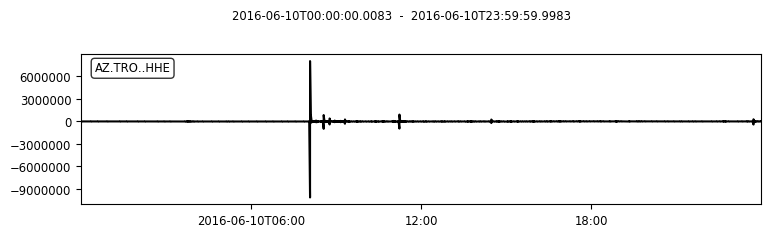

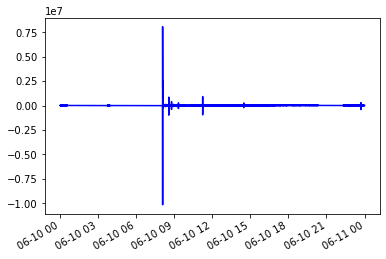

700463050.3


/srv/conda/envs/seismic-wiggles-env/lib/python3.7/site-packages/IPython/core/events.py:88: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/srv/conda/envs/seismic-wiggles-env/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


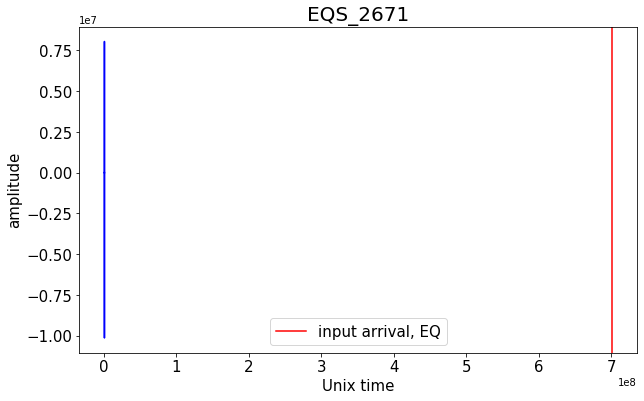

In [24]:
# retrieve test wiggle
wiggle = read('../20160610000000.AZ.TRO.HHE.mseed')
wiggle.plot()

# plot test using matplotplib
wiggle = wiggle[0]
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.plot(wiggle.times("matplotlib"), wiggle.data, "b-")
ax.xaxis_date()
fig.autofmt_xdate()
plt.show()

# add model data
%matplotlib inline

#randomly choose a wiggle in EQS
ID = np.random.choice(len(test['EQS']))
fig, ax = plt.subplots(figsize = (10,6))

k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)

fig = plt.plot(wiggle.times("matplotlib"), wiggle.data, "b-")
fig = plt.axvline(x=float(test['EQS'][ID]['time']),color = 'red', 
                  label = 'input arrival, {}'.format(test['EQS'][0]['event_type']))
x=float(test['EQS'][ID]['time'])
print(x)

ax.set_title('EQS_{}'.format(ID),fontsize = 20)
ax.set_ylabel('amplitude', fontsize=15)
ax.set_xlabel('Unix time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)
    

757960313.64


Button(description='Yes', icon='check', style=ButtonStyle(), tooltip='Click me')

Button(description='No', style=ButtonStyle(), tooltip='Click me')

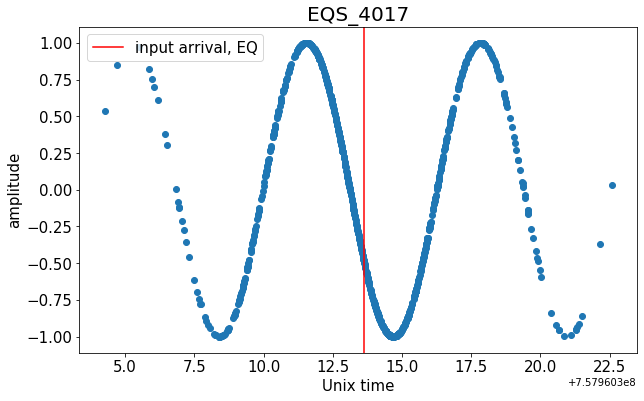

In [28]:
#add some wiggles
%matplotlib inline

#randomly choose a wiggle in EQS
ID = np.random.choice(len(test['EQS']))

fig, ax = plt.subplots(figsize = (10,6))

k = np.random.normal(float(test['EQS'][ID]['time']), 3, 1000)
fig = plt.scatter(k, np.sin(k))
fig = plt.axvline(x=float(test['EQS'][ID]['time']),color = 'red', 
                  label = 'input arrival, {}'.format(test['EQS'][0]['event_type']))
x=float(test['EQS'][ID]['time'])
print(x)

ax.set_title('EQS_{}'.format(ID),fontsize = 20)
ax.set_ylabel('amplitude', fontsize=15)
ax.set_xlabel('Unix time', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(fontsize=15)

# add widgets
bool_yes = widgets.Button(
    description='Yes',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
    icon='check'
)

bool_no = widgets.Button(
    description='No',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Click me',
)

def button_handler():
    print('clicked!')

bool_yes.on_click(button_handler)
bool_no.on_click(button_handler)

display(bool_yes)
display(bool_no)
plt.show()

In [ ]:
wg = pd.DataFrame(np.random.randn())
plt.plot(test['EQS'][0]['time'])

In [ ]:
%matplotlib --list

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
plt.close()
%matplotlib notebook
plt.rcParams['animation.html'] = 'jshtml'

data_index = 5
path = '/var/tmp/passiveseismic/Rhythm/modeling/'
f = open(path + 'bmhsm'+str(data_index)+'.rsf@', 'rb')
bm = np.fromfile(f, dtype = 'float32')
bm = bm.reshape((nz, nx), order = 'f')
plt.figure()
plt.imshow(bm)
plt.show()

plt.close()

In [ ]:
## Path of data
path = '/var/tmp/passiveseismic/Rhythm/modeling/'

In [ ]:
## Dimensions
nx = 391
nt = 1501
dims2 = [t, a]

In [ ]:
plt.plot(np.sin(range(100)))

In [ ]:
def open_bin(bin_file, dims):

    file = open(path + bin_file, 'rb')
    M = np.fromfile(file, dtype = 'float32')
    M = M.reshape(dims, order = 'f')

    return M

In [ ]:
# Generating Matrix Data
def matrix_data(data_index):

    P = 'Pmovie'+str(data_index)+'.rsf@'
    Z = 'Zmovie'+str(data_index)+'.rsf@'
    X = 'Xmovie'+str(data_index)+'.rsf@'

    Vel = 'bmhsm'+str(data_index)+'.rsf@'

    Wiggle = open_bin(P, dims3)
    ZM = open_bin(Z, dims3)
    XM = open_bin(X, dims3)

    VelM = open_bin(Vel, dims2)
    
    return PM, ZM, XM, VelM

#Plot Data


In [ ]:
def plot(data_index):
    
    PM, ZM, XM, VelM = matrix_data(data_index)
    
    a = np.max(PM)
    b = np.min(PM)


    fig = plt.figure()
    ax = fig.add_subplot(411)
    ax1 = fig.add_subplot(412)
    ax2 = fig.add_subplot(413)
    ax3 = fig.add_subplot(414)
    fig.show()

    i = 0
    ax.imshow(VelM)
    while i<nt:
        ax1.cla()
        ax2.cla()
        ax3.cla()
    
        ax1.imshow(PM[:,:,i])  #, vmax = a-0.5, vmin = b+0.5

        ax2.imshow(XM[:,:,i], cmap = 'gray')  #, vmax = a, vmin = b

        ax3.imshow(ZM[:,:,i], cmap = 'gray')  #, vmax = a, vmin = b

        fig.canvas.draw()

        #time.sleep(1)
        i += 10

    plt.close()
    return

In [ ]:
plt.close()
plot(rand_num)